# Covid does not discriminate, inequality does 
### Comparison of COVID-19 Fatality Across London Boroughs from Machine Learning


#### This study is going to look at Covid-19 infection cases in different boroughs of London. I will look at different factors which may affect high infection rates and try to understand whether certain groups of people are more likely than others to be infected, and what can be learned to protect the population. I will use the model to predict the death rate and death numbers following the second wave of surge in Covid cases in November. 


## 1. Introduction 
### 1.1 Background

2020 has been dominated by the Covid-19 global pandemic; over 55 million people have been infected and over 1 million have died globally. The UK with a large infected population is experiencing huge social, economic and health impacts on society. This study is going to look at London,the UK’s capital, to understand whether the fatality rate in each borough is related to that borough's demographic structure.

### 1.2 Problem
At the beginning of the pandemic there was an understanding that the virus does not discriminate. Meaning whether one is rich or poor, old or young, healthy or not, one is equally likely to be infected by this highly contagious virus. This is true to a certain extent, however fatality rate is much higher for people with certain ethnic and economic backgrounds. According to a recent article from The Economist, in England a black man is nearly 4 times more likely to die from contracting Covid-19 than a white man of a similar age. The reason is not genetic, but socioeconomic factors. For example, ethnic minority groups are more likely to work in low status jobs where the luxury of working from home is not an option, and more likely to have to travel to work using public transport, where social distancing is not always possible. All these reasons contribute to higher chances of exposure to infection and further complications. 

This study is going to look at Covid-19 death rate in London, a melting pot with large variations in socioeconomic background. I will look at different factors which may affect infection rate and death rate and try to understand how certain features such as race and pre-existing medical conditions affect the death rate. I will also build a multilinear model to use October’s case rate to predict the death rate for different London boroughs in November. 


### 1.3 Importance
This study was written as the UK government announced a second national lockdown. The lockdown will hopefully relieve some pressure on the NHS, and save lives. I argue however that the effect of the national lockdown will be disproportionate in different boroughs according to their socioeconomic structure. Those who do not have the luxury to isolate will still be exposed to the virus. While it is important for the government to do all it can to reduce overall cases, some of the economically disadvantaged population may need extra attention because while the virus may not discriminate, social conditions do. 


## 2. Data requirements



### 2.1 Data sources
Instead of looking at the demographic information for all Covid-19 death cases, I used the existing demographic data in London as independent variables to test whether boroughs with a higher proportion of certain features tend to have higher Covid-19 death rates.  

I first obtain a list of London boroughs from the Wikipedia page. To visualize the difference of London boroughs I will create Choropleth maps by using a json file of London boroughs boundaries from Stuart Grange, an air quality data scientist. 

Greater London Authority (GLA) has regularly been updating Covid-19 related statistics on its website. I was able to find the Covid 19 cases numbers divided by every borough since the pandemic starts. However the death number for every borough only lasts till June 1st. The most recent death numbers are only divided by parts of England and group London as a whole, which is not applicable for this study.  

Greater London Authority (GLA) commissioned the University of Manchester to conduct research of Covid-19  on existing social and economic inequalities. They have provided some key data on inequality measurements. I will be using these data to test the correlation of different social factors with Covid-19 death rates.  

Below are the list of data sources. 

1. List of boroughs and local authorities from London Borough Profiles and Atlas by Greater London Authority (GLA)
2. Coronavirus (COVID-19) Cases by The Greater London Authority (GLA), covering from March 2020 to date (Nov 16 2020)
3. Coronavirus (COVID-19) Deaths by The Greater London Authority (GLA), covering from March 2020 to June 1st 2020
4. Rapid Evidence Review - Inequalities in relation to COVID-19 and their effects on London  by The Greater London Authority (GLA)

### 2.2 Data cleaning
Data first downloaded or scraped from multiple sources were combined into one table.  Apart from the wikipedia table which has already been organised by borough name, all other files are organised by districts within the borough. In order to compare the data at the borough level, I grouped the data by boroughs, this is either done by summing up the number for all boroughs, or in the cases where the data is represented by the proportion of the population, I used the mean from all districts. 
In order to select the right date period, the value for the date column first needs to be changed from object to date using the ‘to_datetime’ command. An issue I encountered was the number of cases for two of the boroughs ( City of London and Hackney) were recorded as one, Hackney and City of London. I was able to manually correct my data by finding out the individual numbers from Hackney Council’s website (https://hackney.gov.uk/coronavirus-data). 



#### Obtain the London postal data from the wikipeadia page and transform the data into a pandas dataframe

In [1]:
#Install lxml and import pandas, read url into dataframes
!pip install lxml
import pandas as pd


     |████████████████████████████████| 5.5MB 5.7MB/s eta 0:00:01


In [2]:
#Load the wikipedia page with list of London boroughs
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
dfs = pd.read_html(url)
# Select only the first table from Wikipedia page

df=dfs[0]
df.head()

# Data cleanning 
#1. Drop column 'Inner' 'Status' as they are irrelvant to the analysis
#2. Tidy up names for column Borough by removing fields with[note]

df1=df.drop(['Inner', 'Status'], axis=1)
df1.at[0,'Borough']='Barking and Dagenham'
df1.at[9,'Borough']='Greenwich'
df1.at[11,'Borough']='Hammersmith and Fulham'
df2=df1.rename(columns={'Population (2013 est)[1]': 'Population'})
df2.head()

Borough                              Local authority  \
0  Barking and Dagenham  Barking and Dagenham London Borough Council   
1                Barnet                Barnet London Borough Council   
2                Bexley                Bexley London Borough Council   
3                 Brent                 Brent London Borough Council   
4               Bromley               Bromley London Borough Council   

  Political control                               Headquarters  Area (sq mi)  \
0            Labour                   Town Hall, 1 Town Square         13.93   
1      Conservative  Barnet House, 2 Bristol Avenue, Colindale         33.49   
2      Conservative            Civic Offices, 2 Watling Street         23.38   
3            Labour          Brent Civic Centre, Engineers Way         16.70   
4      Conservative              Civic Centre, Stockwell Close         57.97   

   Population                                 Co-ordinates  Nr. in map  
0      194352  51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E          25  
1      369088  51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W          31  
2      236687  51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E          23  
3      317264  51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W          12  
4      317899  51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E          20

#### Import Coronavirus (COVID-19) cases data from The Greater London Authority (GLA)

In [3]:
# Load the csv file with London Covid cases data, the data are the sum of cases for each borough per day. We will need to get the aggregate case numbers for each borough to date. 
Ldn_covid_case = pd.read_csv('phe_cases_london_boroughs.csv')
# Convert the data type for date from object to date
Ldn_covid_case['date'] = pd.to_datetime(Ldn_covid_case['date'], format='%Y-%m-%d')


In [6]:
Ldn_covid_case_Q2= Ldn_covid_case.loc[Ldn_covid_case['date'] <= ('2020-05-15')]


In [7]:
# Import numpy
import numpy as np # library to handle data in a vectorized manner

# Use pivot table to obtain total cases up until mid May

Ldn_covid_case_sum1 = pd.pivot_table(Ldn_covid_case_Q2, values=['new_cases'],index=['area_name'],
                     aggfunc=np.sum)
Ldn_covid_case_sum2 = pd.DataFrame(Ldn_covid_case_sum1.to_records())
Ldn_covid_case_5m_sum= Ldn_covid_case_sum2.rename(columns={'area_name': 'Borough','new_cases':'total_cases_till_mid_May'})
Ldn_covid_case_5m_sum.head()

Borough  total_cases_till_mid_May
0  Barking and Dagenham                       635
1                Barnet                      1473
2                Bexley                       922
3                 Brent                      1589
4               Bromley                      1429

### Seperately we will need the overall cases number to date in order in the later part of the analysis to predict the death rate 

In [8]:
Ldn_covid_case_td= pd.pivot_table(Ldn_covid_case, values=['new_cases'],index=['area_name'],aggfunc=np.sum)
Ldn_covid_case_sumtd = pd.DataFrame(Ldn_covid_case_td.to_records())
Ldn_covid_case_10m_sum= Ldn_covid_case_sumtd.rename(columns={'area_name': 'Borough','new_cases':'total_cases_YTD'})

Ldn_covid_case_10m_sum.head()

Borough  total_cases_YTD
0  Barking and Dagenham             3431
1                Barnet             5774
2                Bexley             3708
3                 Brent             5275
4               Bromley             4101

### To prepare for the prediction of death rate in November, we will need the cases number for October, assuming there is a time lag 

In [9]:
October = (Ldn_covid_case['date']>='2020-10-01') & (Ldn_covid_case['date'] <= '2020-10-30')
Ldn_covid_case_Oct= Ldn_covid_case.loc[October]
Ldn_covid_case_Oct1= pd.pivot_table(Ldn_covid_case_Oct, values=['new_cases'],index=['area_name'],aggfunc=np.sum)
Ldn_covid_case_Oct2 = pd.DataFrame(Ldn_covid_case_Oct1.to_records())
Ldn_covid_case_Oct3= Ldn_covid_case_Oct2.rename(columns={'area_name': 'Borough','new_cases':'total_cases_in_Oct'})

Ldn_covid_case_Oct3.head()

Borough  total_cases_in_Oct
0  Barking and Dagenham                1123
1                Barnet                2001
2                Bexley                1044
3                 Brent                1503
4               Bromley                1251

### Download data from the London Covid Data files and consolication

In [10]:
xls_ineqlty = pd.ExcelFile('London_data_2020_06_01.xlsx')
London_death = pd.read_excel(xls_ineqlty, '1 deaths')
London_population = pd.read_excel(xls_ineqlty, '2 population')
London_occupation = pd.read_excel(xls_ineqlty, '3 occupation')
London_ethnic = pd.read_excel(xls_ineqlty, '4 ethnic_group')
London_deprivation = pd.read_excel(xls_ineqlty, '5 deprivation')
London_child_poverty = pd.read_excel(xls_ineqlty, '6 child_poverty')
London_med_con = pd.read_excel(xls_ineqlty, '7 medical_conditions')
# Combining data based on MSOA11NM code and local authority names
# First change 'local authority' to 'Borough' in the London_death file
London_death2= London_death.rename(columns={'Local authority': 'Borough','MSOA11NM' :'Area code','covid_19_deaths' :'covid_19_deaths_1st_5m'})
#Join up all the files based on MSOA11CD code
df_merged1 = (pd.merge(London_death2, London_population,how = 'left', on=['MSOA11CD']))
df_merged2 = (pd.merge(df_merged1, London_occupation,how = 'left', on=['MSOA11CD']))
df_merged3 = (pd.merge(df_merged2, London_ethnic,how = 'left', on=['MSOA11CD']))
df_merged4 = (pd.merge(df_merged3, London_child_poverty,how = 'left', on=['MSOA11CD']))
df_merged5 = (pd.merge(df_merged4, London_med_con,how = 'left', on=['MSOA11CD']))
df_merged6= df_merged5.drop(columns=['MSOA11NM_y', 'Local authority_x','Local Authority_x','Local authority_y','Local Authority_y','MSOA11NM_x','MSOA11NM','covid_19_deaths_per_thousand' ])

df_merged6.head()

MSOA11CD                 Area code               Borough  \
0  E02000001        City of London 001        City of London   
1  E02000002  Barking and Dagenham 001  Barking and Dagenham   
2  E02000003  Barking and Dagenham 002  Barking and Dagenham   
3  E02000004  Barking and Dagenham 003  Barking and Dagenham   
4  E02000005  Barking and Dagenham 004  Barking and Dagenham   

   covid_19_deaths_1st_5m  total_population_mid_2018  over_70_prop  \
0                       3                       8706      0.123593   
1                       2                       7720      0.103886   
2                       3                      11051      0.085965   
3                       9                       6586      0.124658   
4                       5                      10229      0.066282   

   proportion_at_risk_jobs  insecure_proportion  all_bame_prop  \
0                 0.120794             0.077743       0.213695   
1                 0.345813             0.318841       0.350111   
2                 0.309099             0.260850       0.453858   
3                 0.311407             0.265570       0.190230   
4                 0.337135             0.322392       0.337304   

   all_black_prop  pakistani_or_bangladeshi_prop  all_indian_prop  \
0        0.026169                       0.033627         0.029288   
1        0.167232                       0.047970         0.039852   
2        0.161075                       0.104629         0.080836   
3        0.104982                       0.016338         0.007603   
4        0.168769                       0.058748         0.035155   

   child_poverty_prop       Local authority  total_registered_patients  \
0            0.052592        City of London                       8584   
1            0.273855  Barking and Dagenham                       8315   
2            0.246672  Barking and Dagenham                      11873   
3            0.201967  Barking and Dagenham                       6852   
4            0.231935  Barking and Dagenham                      11150   

   Hypertension  Obesity (18+)  Diabetes  Asthma  Coronary heart disease  
0          7.95           3.62      2.70    3.08                    1.50  
1          9.26           6.15      4.99    3.91                    1.88  
2         10.33           7.60      5.79    4.64                    1.83  
3          9.34           8.36      4.95    3.58                    1.93  
4          9.37           8.79      5.15    4.26                    1.47

### 2.3 Variable selection
One thing to point out that the death numbers for each borough provided by Rapid Evidence Review are only available till June 1st. I created a variable for total cases by mid May given there is around a two week time lag between cases and death numbers. Because all inequality variables are measured by proportion of the population, I used Covid-19 cases and death per population as the measurement for comparison. 


Here are the variables I added to the data:

1. Population_density: this is the population density in the borough. Calculated by dividing population by the area(sq mi)               
2. Total number of cases by mid May and total number of cases today. In  the Covid-19 cases data, not only we will need to group by borough name, but also the total cases by adding up the number of new cases up until a date. The reason I obtained the mid  May cases number separately to all numbers to date is to generate a regression model that predicts the death rate using the cases up till May, given death is 2 weeks lags cases number. Separately I also obtained the total cases in October alone in order to predict the death rate in November based on the model I developed. 
3. I obtained the cases per 1000 people within the borough by dividing cases numbers by population. 
4. Similarly for the death number, I obtained both the sum of all deaths for each borough from the beginning of the pandemic to June 1st, and the rate per 1000 people.         


#### Group by Borough


In [11]:
# summarise by local authority of sum of Covid 19 death tolls and average of Covid 19 death per thousand
df_borough= df_merged6.groupby('Borough').agg({
    'covid_19_deaths_1st_5m': sum,
    'total_population_mid_2018': sum,
    'over_70_prop': np.mean,
    'proportion_at_risk_jobs': np.mean,
    'insecure_proportion': np.mean,
   'all_bame_prop': np.mean,
    'all_indian_prop': np.mean,
    'pakistani_or_bangladeshi_prop': np.mean,
    'all_black_prop': np.mean,
    'child_poverty_prop': np.mean,
    'total_registered_patients': sum,
    'Hypertension': np.mean,
    'Obesity (18+)': np.mean,
    'Diabetes': np.mean,
    'Asthma': np.mean,
    'Coronary heart disease': np.mean   
})
df_borough = pd.DataFrame(df_borough.to_records())

# Recalculating Covid 19 death per thousand based on aggregate covid 19 death in one borough divided by total population mid 2018, drop the old covid 19 deaths per thousand based on mean of old number
df_borough.insert(2, 'covid_19_deaths_1st_5m_pp', (df_borough['covid_19_deaths_1st_5m'] / df_borough['total_population_mid_2018']*1000))
# Merge with cases number from June and end of October.
df_borough1 = (pd.merge(df_borough, Ldn_covid_case_5m_sum,how = 'left',  on=['Borough']))
df_borough2 = (pd.merge(df_borough1, Ldn_covid_case_10m_sum, how = 'left', on=['Borough']))
df_borough3= (pd.merge(df_borough2, Ldn_covid_case_Oct3, how = 'left', on=['Borough']))

# Manually updating New cases number for City of London and Hackney
df_borough3.at[6,'total_cases_till_mid_May']= 20
df_borough3.at[11,'total_cases_till_mid_May']= 768
df_borough3.at[6,'total_cases_YTD']= 69
df_borough3.at[11,'total_cases_YTD']= 3390
df_borough3.at[6,'total_cases_in_Oct']= 51
df_borough3.at[11,'total_cases_in_Oct']= 1520
df_borough3.insert(1, 'total_cases_till_mid_May_pp', (df_borough3['total_cases_till_mid_May'] / df_borough3['total_population_mid_2018']*1000))
df_borough3.insert(2, 'total_cases_YTD_pp', (df_borough3['total_cases_YTD'] / df_borough3['total_population_mid_2018']*1000))
df_borough3.insert(3, 'total_cases_in_Oct_pp', (df_borough3['total_cases_in_Oct'] / df_borough3['total_population_mid_2018']*1000))

# Merge with Wikipedia page to get the population density
df_borough4 = (pd.merge(df_borough3, df2,how = 'left', on=['Borough']))


# Remove columns we don't need
df_borough_sum= df_borough4.drop(columns=['Local authority', 'Headquarters','Population','Co-ordinates','Nr. in map','Political control'])

#Add population density number
df_borough_sum.insert(23,'Population_density', (df_borough_sum['total_population_mid_2018'] / df_borough_sum['Area (sq mi)']))
df_borough_sum.at[6,'Population_density']= 7773

df_borough_sum_sort=df_borough_sum.sort_values(by=['covid_19_deaths_1st_5m_pp', 'all_bame_prop'], axis=0, ascending=False)
df_borough_sum_sort.head(10)

Borough  total_cases_till_mid_May_pp  total_cases_YTD_pp  \
14     Harrow                     4.729181           16.182355   
3       Brent                     4.803579           15.946432   
1      Barnet                     3.756312           14.724333   
8      Ealing                     4.070390           19.158903   
9     Enfield                     3.213835           14.592550   
7     Croydon                     4.466116           12.866359   
15   Havering                     3.285365           18.777394   
13   Haringey                     2.549663           13.228686   
24     Newham                     3.249954           15.795230   
25  Redbridge                     3.202154           18.604085   

    total_cases_in_Oct_pp  covid_19_deaths_1st_5m  covid_19_deaths_1st_5m_pp  \
14               5.200900                     241                   0.963426   
3                4.543600                     304                   0.918998   
1                5.102769                     287                   0.731881   
8                7.336643                     239                   0.698867   
9                5.295490                     220                   0.658941   
7                3.770637                     252                   0.653958   
15               5.938482                     166                   0.643885   
13               5.335816                     168                   0.620788   
24               5.701624                     208                   0.590901   
25               6.618223                     174                   0.572636   

    total_population_mid_2018  over_70_prop  proportion_at_risk_jobs  \
14                     250149      0.114148                 0.248506   
3                      330795      0.085853                 0.265766   
1                      392140      0.104650                 0.256486   
8                      341982      0.089893                 0.251468   
9                      333869      0.098564                 0.291144   
7                      385346      0.099756                 0.276184   
15                     257810      0.137685                 0.274036   
13                     270624      0.070092                 0.260226   
24                     352005      0.051574                 0.303422   
25                     303858      0.090680                 0.275670   

    insecure_proportion  ...  Hypertension  Obesity (18+)  Diabetes    Asthma  \
14             0.198463  ...     12.159667       5.306000  6.860333  4.835333   
3              0.275396  ...     10.687647       5.904412  6.122353  3.862941   
1              0.206510  ...     10.554146       5.017317  4.684878  3.986585   
8              0.242716  ...     11.008462       6.183590  5.653590  4.522308   
9              0.255980  ...     11.813611       7.041389  5.496944  4.309167   
7              0.227733  ...     11.149091       5.770455  4.928409  4.360000   
15             0.227969  ...     12.951667       7.028667  5.305667  4.477667   
13             0.248877  ...      9.272778       6.933056  4.527222  4.012222   
24             0.322160  ...      9.150270       7.233243  5.910811  3.894324   
25             0.212336  ...     10.395806       5.887419  5.996129  4.182258   

    Coronary heart disease  total_cases_till_mid_May  total_cases_YTD  \
14                2.479333                    1183.0           4048.0   
3                 1.817059                    1589.0           5275.0   
1                 2.215854                    1473.0           5774.0   
8                 2.158974                    1392.0           6552.0   
9                 2.111944                    1073.0           4872.0   
7                 1.984545                    1721.0           4958.0   
15                2.466000                     847.0           4841.0   
13                1.448889                     690.0           3580.0   
24                1.534595                    1144.0    

After data clearning we have a workable data frame df_borough_sum with all key variables to proceed with the analysis

## 3. Methodology and Exploratory Data Analysis 


### 3.1 Generate chropleth map using COVID-19 death data for London 
I  plotted death rate using Choropleth Map, a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map. 

We can see Harrow and Brent have the highest death per thousand rate among all London boroughs. Neither Harrow or Brent has the highest proportion of ethnically minorities or proportion of workers at risk and having insecure positions, Newham tops all these accounts. However, Harrow and Brent both have higher patients with diabete. It might suggest diabetes has a higher correlation with a higher death rate than most other factors. 


In [12]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.11.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.11.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36he6145b8_1001         347 KB  conda-forge
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    chardet-3.0.4              |py36h9880bd3_1008         194 KB  conda-forge
    cryptography-3.2.1         |   py36h6ec43e4_0         633 KB  conda-forge
    folium-0.11.0              |             py_0    

In [16]:
# Use Choropleth Map, a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map.  
# We would need a Geojson fie to load the boroughs in London
# Here I am creating a map of London by using London's geographic coordinates
London_map = folium.Map(width=700,height=500,location=[51.50,-0.11], zoom_start=10, tiles='Mapbox Bright')
London_geo = r'london_boroughs.json'
# Use Covid cases  data 
choropleth = folium.Choropleth(
    geo_data=London_geo,
    data=df_borough_sum,
    columns=[ 'Borough','covid_19_deaths_1st_5m_pp'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='London Borough first 5 months death per thousand',
).add_to(London_map)

folium.LayerControl().add_to(London_map)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=False)
)
London_map

<h4>Correlation coeffient on Covi-19 death rate</h4>
<p>In order to understand what factors affect the death rate, I ran coefficient tests to show the magnitude of the correlation between each variable and the target variable. The target variable is the death rate for each borough, calculated by dividing the total death number by the population within the borough. To use the death rate rather than absolute death number is to standardise the population and size of the boroughs.  The correlations are to what extent different variables are interdependent, it ranges between 0-1, the closer to 1 the higher the correlation and vice versa.  I also use p-value to test how strongly certain we are of the result. The P-value is the probability value that the correlation between these two variables is statistically significant. A p-value less than 0.001 means there is strong certainty in the results. And P value greater than 0.1 suggests no certainty in the result.</p>


Here is an overview of the correlation coefficient, I highlighted the variables which seem to have positive correlation with the death rate. I will go through each of the variables individually in the following session and discuss their statistical significance. 


In [14]:
df_borough_sum[['covid_19_deaths_1st_5m_pp','total_cases_till_mid_May_pp','Population_density','over_70_prop','proportion_at_risk_jobs','insecure_proportion',
      'all_bame_prop','all_indian_prop','pakistani_or_bangladeshi_prop','all_black_prop','child_poverty_prop',
      'Hypertension','Obesity (18+)','Diabetes','Asthma','Coronary heart disease']].corr()

covid_19_deaths_1st_5m_pp  \
covid_19_deaths_1st_5m_pp                       1.000000   
total_cases_till_mid_May_pp                     0.581240   
Population_density                             -0.219486   
over_70_prop                                    0.144365   
proportion_at_risk_jobs                         0.357927   
insecure_proportion                             0.415038   
all_bame_prop                                   0.489442   
all_indian_prop                                 0.628634   
pakistani_or_bangladeshi_prop                  -0.053615   
all_black_prop                                  0.241785   
child_poverty_prop                              0.175117   
Hypertension                                    0.476870   
Obesity (18+)                                   0.306302   
Diabetes                                        0.695716   
Asthma                                          0.210971   
Coronary heart disease                          0.410394   

                               total_cases_till_mid_May_pp  \
covid_19_deaths_1st_5m_pp                         0.581240   
total_cases_till_mid_May_pp                       1.000000   
Population_density                               -0.360598   
over_70_prop                                      0.260983   
proportion_at_risk_jobs                           0.350218   
insecure_proportion                               0.278717   
all_bame_prop                                     0.172677   
all_indian_prop                                   0.391498   
pakistani_or_bangladeshi_prop                    -0.278940   
all_black_prop                                    0.166728   
child_poverty_prop                               -0.045609   
Hypertension                                      0.521221   
Obesity (18+)                                     0.122961   
Diabetes                                          0.439810   
Asthma                                            0.367968   
Coronary heart disease                            0.425461   

                               Population_density  over_70_prop  \
covid_19_deaths_1st_5m_pp               -0.219486      0.144365   
total_cases_till_mid_May_pp             -0.360598      0.260983   
Population_density                       1.000000     -0.751372   
over_70_prop                            -0.751372      1.000000   
proportion_at_risk_jobs                 -0.279945     -0.189640   
insecure_proportion                     -0.142107     -0.332585   
all_bame_prop                            0.329009     -0.619442   
all_indian_prop                         -0.282453      0.094205   
pakistani_or_bangladeshi_prop            0.310589     -0.467256   
all_black_prop                           0.375445     -0.670943   
child_poverty_prop                       0.341054     -0.697942   
Hypertension                            -0.759550      0.619504   
Obesity (18+)                           -0.157098     -0.180026   
Diabetes                                -0.302177     -0.008568   
Asthma                                  -0.398717      0.183243   
Coronary heart disease                  -0.774807      0.773408   

                               proportion_at_risk_jobs  insecure_proportion  \
covid_19_deaths_1st_5m_pp                     0.357927             0.415038   
total_cases_till_mid_May_pp                   0.350218             0.278717   
Population_density                           -0.279945            -0.142107   
over_70_prop                                 -0.189640            -0.332585   
proportion_at_risk_jobs                       1.000000             0.919983   
insecure_proportion                           0.919983             1.000000   
all_bame_prop                                 0.369243             0.543810   
all_indian_prop                               0.236431             0.322758   
pakistani_or_bangladeshi_prop                 0.192510             0.254098   
all_black_prop           

### 3.2 Relationship between death rate and case rate
The higher the cases the more chances some of them may not survive, hence the death rate should have a positive correlation with the case rate. And this is reflected by the correlation, we see the coefficient to be 0.58% with a p-value less than 0.001, meaning this result gives a strong certainty. I have also shown this in a regplot. 


In [25]:
# Import visualization packages "Matplotlib" and "Seaborn"

! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline 

In [19]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['total_cases_till_mid_May_pp'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.581239892720715  with a P-value of P = 0.0003894155182507735


(0.0, 0.997284622415619)

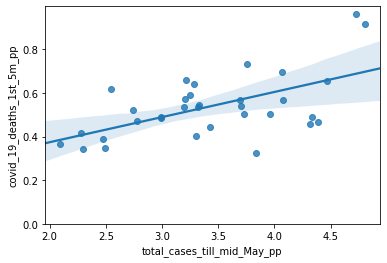

In [46]:
# Positive linear relationship to test Covid-19 death numbers with population density 
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="total_cases_till_mid_May_pp", data=df_borough_sum)
plt.ylim(0,)

### 3.3 Relationship between death rate and population density
Because Covid-19 is a highly infectious disease, one can expect that the higher the population density the higher the infection rate and death rate. However this is not reflected in our data. The Pearson Correlation Coefficient is -0.22  which implies the population density is somehow negatively correlated with death rate. This might be because other factors which are not tested here such as hospital facilities, it might be possible the higher the density the better and more available hospital facilities hence patients get better treatment that enable them to recover better from Covid-19. The P-value of 0.22 then suggests we can not rely on the result of this test. Hence population density on itself can not be used as a predictor for the Covid-19 death rate. 


In [20]:
# Find the correlation between covid_19_deaths_per_1000 and Population_density.
pearson_coef, p_value = stats.pearsonr(df_borough_sum['Population_density'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.2194855738756643  with a P-value of P = 0.21972312244040654


(0.0, 0.9953549954700583)

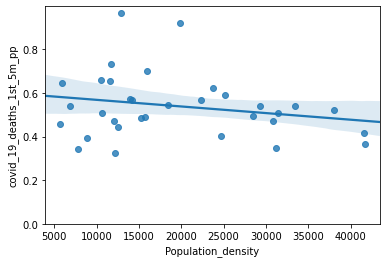

In [47]:
# Positive linear relationship to test Covid-19 death numbers with population density 
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="Population_density", data=df_borough_sum)
plt.ylim(0,)


### 3.4 Relationship between death rate and aging
The elderlies are considered a vulnerable group who can get severely ill from getting contracted of the virus, hence more likely to die. The coefficient does suggest a positive effect on death rate, however the magnitude is small and the p-value is 0.42, too large for us to conclude the correlation with any certainty. Hence aging on its own does not help to predict the death rate in a borough.


In [22]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['over_70_prop'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.14436507861003434  with a P-value of P = 0.42281377187366787


(0.0, 0.9953549954700583)

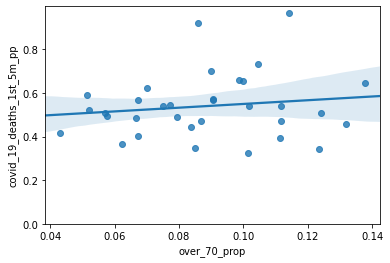

In [23]:
# Positive linear relationship to test Covid-19 death with aging population 
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="over_70_prop", data=df_borough_sum)
plt.ylim(0,)

We can see a very small positive relationship between aging population and covid-19 death per 1000 population

### 3.5 Relationship between death rate and job security and risk exposure at work
The variable ‘proportion_at_risk_jobs’ test the proportion of the occupations are at risk of contracting the virus. And ‘insecure_proportion’ are defined as the proportion employed in a job with a temporary contract, working through an employment agency or self-employed. Both of these factor should increase the chances of exposure to the virus and increase the death rate. The coefficients are 0.35 and 0.41 respectively indicating positive effects of both on death rate. The p-values are  0.04 and 0.016, we can say with moderate confidence that the correlation is significant.


In [24]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['proportion_at_risk_jobs'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3579274700226212  with a P-value of P = 0.04083804166364815


In [25]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['insecure_proportion'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.41503788640731926  with a P-value of P = 0.016317398830816815


Having a job that expose higher proportion at risk and having an insecure job has a small positive correlation with higher Covid-19 cases per population and even higher correlation with Covid_19 related death. 

(0.0, 0.999893902872115)

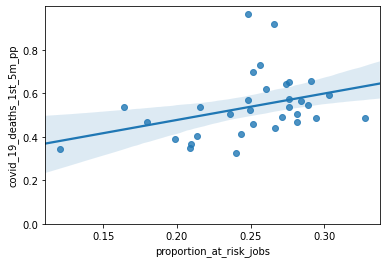

In [26]:
# Positive linear relationship to test Covid-19 death with porpotion of at risk jobs 
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="proportion_at_risk_jobs", data=df_borough_sum)
plt.ylim(0,)

(0.0, 0.999267926804617)

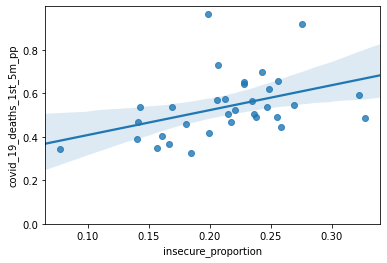

In [27]:
# Positive linear relationship to test Covid-19 death with insecure_proportion 
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="insecure_proportion", data=df_borough_sum)
plt.ylim(0,)

### 3.6 Relationship between death rate and ethnic origins
Many recent studies suggest ethnically minority groups are more likely to contract Covid-19 and have a high chance of dying than white population. This is because of a high proportion of ethnically minority groups having insecure jobs and/or working on jobs that exposes to Covid risk. 

From the model, we see a positive coefficient for all ethnically minority groups on death rate which confirms the general understanding. In particular, Indians have a higher correlation with higher death rate than any of other ethnic groups. The correlation of Pakistani or Bangladeshi population on the borough's death rate is not very strong, given the regression line is almost horizontal and the p-value is 0.76 which suggests the correlation not statistically significant. The relationship of higher Black population on the borough's death rate is also not significant given the Pearson correlation coefficient is 0.24 and P-value is 0.17.

Let's develop a model using all ethnicity variables as the predictor variables.

In [28]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['all_bame_prop'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.4894415957752361  with a P-value of P = 0.003842816158217362


In [29]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['all_indian_prop'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6286338089160225  with a P-value of P = 8.938125197279777e-05


In [30]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['pakistani_or_bangladeshi_prop'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.053615270215400974  with a P-value of P = 0.7669753211631309


In [31]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['all_black_prop'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.24178545003663734  with a P-value of P = 0.17522345515403243


(0.0, 0.9976271610359512)

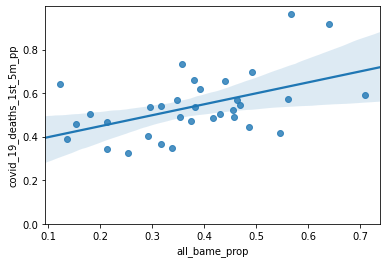

In [48]:
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="all_bame_prop", data=df_borough_sum)
plt.ylim(0,)

(0.0, 1.0478701254610476)

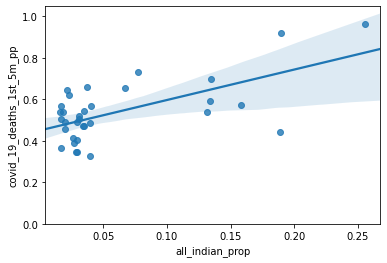

In [49]:
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="all_indian_prop", data=df_borough_sum)
plt.ylim(0,)

(0.0, 0.9953549954700583)

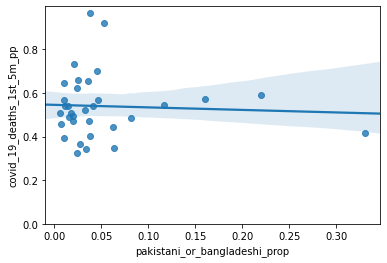

In [50]:
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="pakistani_or_bangladeshi_prop", data=df_borough_sum)
plt.ylim(0,)

(0.0, 0.9953549954700583)

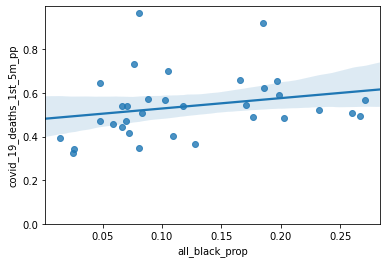

In [51]:
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="all_black_prop", data=df_borough_sum)
plt.ylim(0,)



It is possible that ethnic group alone is not enough to conclud a correlation with higher Covid cases rate or higher death rate. The higher cases rate in particular amoung the Indian community might be a factor or higher porportion of people working on high risk jobs as well as high proverty rate. Hence I will run a multiple linear regression to hold the race, types of jobs and proverty constant to see the correlation.

### 3.7 Relationship between death rate and poverty
Child poverty does not have a strong correlation with death rate, the coefficient is 0.17511682356885322  with a P-value of P = 0.33. This might be that child poverty is not a good measure for property and income of the household, we should use other variables to measure income inequality.

In [33]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['child_poverty_prop'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.17511682356885322  with a P-value of P = 0.32968897332285024


(0.0, 0.9953549954700583)

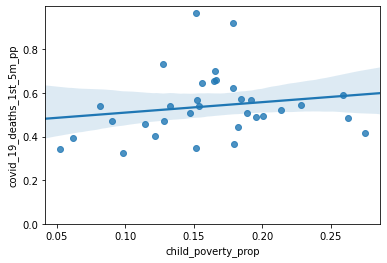

In [34]:
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="child_poverty_prop", data=df_borough_sum)
plt.ylim(0,)

### 3.8 Relationship between death rate and pre-existing medical conditions
It is widely recognised that pre-existing medical conditions increase the effect of Covid, and patients with certain pre-existing medical conditions may suffer more complications of Covid symptoms. The correlation coefficients suggest high blood pressure, obesity diabetes and coronary heart disease all have a strong correlation with higher death rate. Among this, the effect is particularly strong for patients with diabetes, both the coefficient is high (0.70) and p-value suggests significance of the correlation. The effect of asthma on death rate however is not very strong despite the previous belief that Covid-19 attacks the respiratory system.

In [35]:
# Positive linear relationship to test Covid-19 Cases and deaths with medical conditions
df_borough_sum[['Hypertension','Obesity (18+)','Diabetes', 'Asthma','Coronary heart disease','covid_19_deaths_1st_5m_pp']].corr()

Hypertension  Obesity (18+)  Diabetes    Asthma  \
Hypertension                   1.000000       0.510170  0.621616  0.687864   
Obesity (18+)                  0.510170       1.000000  0.678741  0.400934   
Diabetes                       0.621616       0.678741  1.000000  0.507331   
Asthma                         0.687864       0.400934  0.507331  1.000000   
Coronary heart disease         0.878238       0.255961  0.530361  0.584400   
covid_19_deaths_1st_5m_pp      0.476870       0.306302  0.695716  0.210971   

                           Coronary heart disease  covid_19_deaths_1st_5m_pp  
Hypertension                             0.878238                   0.476870  
Obesity (18+)                            0.255961                   0.306302  
Diabetes                                 0.530361                   0.695716  
Asthma                                   0.584400                   0.210971  
Coronary heart disease                   1.000000                   0.410394  
covid_19_deaths_1st_5m_pp                0.410394                   1.000000

In [36]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['Hypertension'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.4768699425424082  with a P-value of P = 0.005018297349699042


In [37]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['Obesity (18+)'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.30630246080453416  with a P-value of P = 0.08297591271615667


In [38]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['Diabetes'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6957155779095326  with a P-value of P = 6.96681186334288e-06


In [39]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['Asthma'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.21097139861470707  with a P-value of P = 0.23858526989601045


In [40]:
pearson_coef, p_value = stats.pearsonr(df_borough_sum['Coronary heart disease'], df_borough_sum['covid_19_deaths_1st_5m_pp'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.41039428538518025  with a P-value of P = 0.017682388729610442


(0.0, 0.9955904108130165)

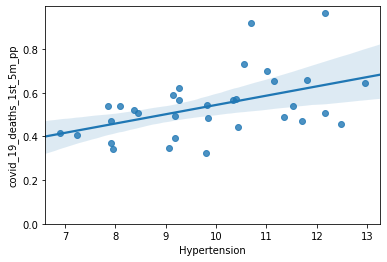

In [41]:
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="Hypertension", data=df_borough_sum)
plt.ylim(0,)

(0.0, 0.9953549954700583)

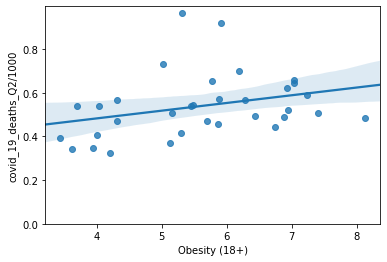

In [208]:
sns.regplot(y="covid_19_deaths_Q2/1000", x="Obesity (18+)", data=df_borough_sum)
plt.ylim(0,)

(0.0, 0.9994627926672879)

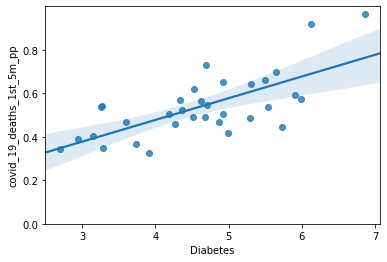

In [42]:
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="Diabetes", data=df_borough_sum)
plt.ylim(0,)

(0.0, 0.9956964091594989)

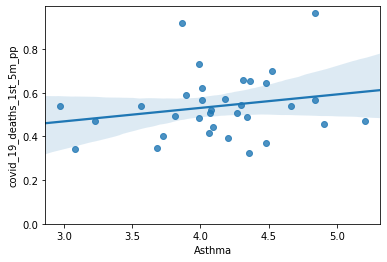

In [43]:
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="Asthma", data=df_borough_sum)
plt.ylim(0,)

(0.0, 0.9953549954700583)

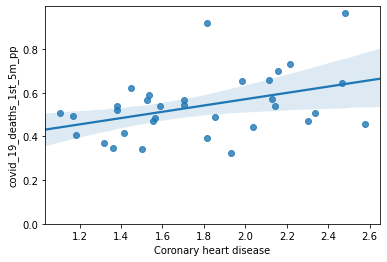

In [44]:
sns.regplot(y="covid_19_deaths_1st_5m_pp", x="Coronary heart disease", data=df_borough_sum)
plt.ylim(0,)

Harrow and Brent both have the highest death rate by per 1000 population 

## 4. Predictive Modeling and Results


### 4.1 Variable selection

Based on the correlation coefficients and p-values, I have selected the following variables to predict the death rate: 

* Cases up until mid May per thousand population
* Proportion of all ethnically minority groups
* Proportion of workers at risky jobs
* Proportion of workers have insecure types of work
* Pre-existing medical conditions: hypertension, obesity, diabetes and coronary heart disease


Although there is such a strong correlation between Indian population and Covid-19 fatality, the variable has been accounted in the variable for all non-white population. 

I used a  multilinear regression model to predict the death rate in November with October’s actual cases number. Linear regression models are using multiple independent variables to predict an outcome.  The R^2 is 0.69 and mean square error (MSE) is 0.0063. R^2 suggests 69% of variation of the target variable (death rate) is explained by the regression model. 
Based on the model, it seems almost all boroughs in London will have higher death per thousand in November alone than the total Covid-19 death per thousand for the first 5 months of the year. It does not mean that the government's lockdown measures have not worked, but a reflection of increased testing capacity, hence there has been a lot more confirmed cases recently. Given our model is using confirmed case rate as a determining factor, we have seen a higher predicted death rate as a result. However it is possible that the cases to death ratio has decreased, the increased confirmed cases may not lead to as many death numbers as the model currently predicting. 

Nonetheless when comparing among boroughs, in November Ealing will take over both Harrow and Brent to have the highest death rate in London, followed by Harrow, Brent, Hounslow and Redbridge. This is because of the high proportion of ethnical minority population and people in insecure jobs.


In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [18]:
Covid_risk_factors1= df_borough_sum[['total_cases_till_mid_May_pp','all_bame_prop','proportion_at_risk_jobs','insecure_proportion',
                              'Hypertension','Obesity (18+)','Diabetes', 'Coronary heart disease']]

In [19]:
lm = LinearRegression()
lm.fit(Covid_risk_factors1, df_borough_sum['covid_19_deaths_1st_5m_pp'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
lm.intercept_

0.018041548188271972

In [21]:
lm.coef_

array([ 0.05748098,  0.26380795, -2.31093792,  0.96514454,  0.04024358,
       -0.00852008,  0.0691183 , -0.04144357])

In [22]:

# Find the R^2
print('The R-square is: ', lm.score(Covid_risk_factors1, df_borough_sum['covid_19_deaths_1st_5m_pp']))

The R-square is:  0.6751591587862122


In [23]:
from sklearn.metrics import mean_squared_error
# The mean square error
Y_predict_multifit = lm.predict(Covid_risk_factors1)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df_borough3['covid_19_deaths_1st_5m_pp'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  0.006676740940911188


In [24]:
covid_exp_death_oct= df_borough_sum[['total_cases_in_Oct_pp','all_bame_prop','proportion_at_risk_jobs','insecure_proportion',
                              'Hypertension','Obesity (18+)','Diabetes', 'Coronary heart disease']]

In [25]:
# Use prediction
Yhat=lm.predict(covid_exp_death_oct)
Yhat

array([0.61866203, 0.62624665, 0.55474333, 0.82716115, 0.50958528,
       0.55815878, 0.62057446, 0.59005025, 0.91434496, 0.70484596,
       0.54445211, 0.60908976, 0.62199383, 0.63366329, 0.89948207,
       0.70446212, 0.78639448, 0.814296  , 0.54839901, 0.62563082,
       0.59470678, 0.63303425, 0.54962816, 0.54352186, 0.79390592,
       0.80881486, 0.52875587, 0.56706491, 0.51853429, 0.67749417,
       0.63387876, 0.4713033 , 0.60891994])

In [26]:
df_borough_sum_2= pd.DataFrame((Yhat),columns=['covid_19_deaths_pp_in_Nov_est'])


In [27]:
df_borough_sum_1=pd.concat([df_borough_sum,df_borough_sum_2], axis=1)

df_borough_sum_1.head()

Borough  total_cases_till_mid_May_pp  total_cases_YTD_pp  \
0  Barking and Dagenham                     2.995311           16.184115   
1                Barnet                     3.756312           14.724333   
2                Bexley                     3.728899           14.996481   
3                 Brent                     4.803579           15.946432   
4               Bromley                     4.315969           12.386136   

   total_cases_in_Oct_pp  covid_19_deaths_1st_5m  covid_19_deaths_1st_5m_pp  \
0               5.297220                     103                   0.485854   
1               5.102769                     287                   0.731881   
2               4.222310                     125                   0.505545   
3               4.543600                     304                   0.918998   
4               3.778360                     152                   0.459081   

   total_population_mid_2018  over_70_prop  proportion_at_risk_jobs  \
0                     211998      0.066743                 0.327370   
1                     392140      0.104650                 0.256486   
2                     247258      0.124081                 0.281594   
3                     330795      0.085853                 0.265766   
4                     331096      0.131820                 0.251344   

   insecure_proportion  all_bame_prop  all_indian_prop  \
0             0.326762       0.415787         0.039189   
1             0.206510       0.357601         0.076919   
2             0.236285       0.179298         0.030658   
3             0.275396       0.639314         0.189916   
4             0.180671       0.153534         0.019729   

   pakistani_or_bangladeshi_prop  all_black_prop  child_poverty_prop  \
0                       0.082035        0.202328            0.262286   
1                       0.021196        0.076664            0.127127   
2                       0.006481        0.082873            0.147438   
3                       0.052533        0.185030            0.178225   
4                       0.007414        0.058465            0.114216   

   total_registered_patients  Hypertension  Obesity (18+)  Diabetes    Asthma  \
0                     235900      9.831364       8.121364  5.295909  3.991364   
1                     425715     10.554146       5.017317  4.684878  3.986585   
2                     253510     12.157143       7.407500  4.920000  4.268929   
3                     405143     10.687647       5.904412  6.122353  3.862941   
4                     351070     12.474103       5.865128  4.268718  4.900256   

   Coronary heart disease  total_cases_till_mid_May  total_cases_YTD  \
0                1.565909                     635.0           3431.0   
1                2.215854                    1473.0           5774.0   
2                2.335714                     922.0           3708.0   
3                1.817059                    1589.0           5275.0   
4                2.575897                    1429.0           4101.0   

   Population_density  total_cases_in_Oct  Area (sq mi)  \
0        15218.808327              1123.0         13.93   
1        11709.166915              2001.0         33.49   
2        10575.620188              1044.0         23.38   
3        19808.083832              1503.0         16.70   
4         5711.505951              1251.0         57.97   

   covid_19_deaths_pp_in_Nov_est  
0                       0.618662  
1                       0.626247  
2                       0.554743  
3                       0.827161  
4                       0.509585

## Sort by highest death rate

In [32]:
df_borough_sum_sort=df_borough_sum_1.sort_values(by=['covid_19_deaths_pp_in_Nov_est'], axis=0, ascending=False)
df_borough_sum_sort

Borough  total_cases_till_mid_May_pp  total_cases_YTD_pp  \
8                   Ealing                     4.070390           19.158903   
14                  Harrow                     4.729181           16.182355   
3                    Brent                     4.803579           15.946432   
17                Hounslow                     3.427111           16.596376   
25               Redbridge                     3.202154           18.604085   
24                  Newham                     3.249954           15.795230   
16              Hillingdon                     3.192006           16.583340   
9                  Enfield                     3.213835           14.592550   
15                Havering                     3.285365           18.777394   
29           Tower Hamlets                     2.281991           16.590863   
30          Waltham Forest                     3.324901           14.983737   
13                Haringey                     2.549663           13.228686   
21                 Lambeth                     3.958063           14.540512   
1                   Barnet                     3.756312           14.724333   
19  Kensington and Chelsea                     3.316325           14.052767   
12  Hammersmith and Fulham                     3.699589           17.327667   
6           City of London                     2.297266            7.925569   
0     Barking and Dagenham                     2.995311           16.184115   
11                 Hackney                     2.746143           12.121646   
32             Westminster                     2.780780           13.555326   
20    Kingston upon Thames                     3.835413           15.119394   
7                  Croydon                     4.466116           12.866359   
27               Southwark                     4.337191           13.143959   
5                   Camden                     2.494032           11.604494   
2                   Bexley                     3.728899           14.996481   
22                Lewisham                     3.696431           11.758078   
18               Islington                     2.094990           12.503032   
10               Greenwich                     2.987568           11.737122   
23                  Merton                     4.073991           13.094973   
26    Richmond upon Thames                     2.473286           12.813351   
28                  Sutton                     4.390661           13.240435   
4                  Bromley                     4.315969           12.386136   
31              Wandsworth                     3.305011           14.123636   

    total_cases_in_Oct_pp  covid_19_deaths_1st_5m  covid_19_deaths_1st_5m_pp  \
8                7.336643                     239                   0.698867   
14               5.200900                     241                   0.963426   
3                4.543600                     304                   0.918998   
17               6.259648                     120                   0.443161   
25               6.618223                     174                   0.572636   
24               5.701624                     208                   0.590901   
16               6.174055                     164                   0.538015   
9                5.295490                     220                   0.658941   
15               5.938482                     166                   0.643885   
29               6.386428                     132                   0.415480   
30               5.175280                     151                   0.545717   
13               5.335816                     168                   0.620788   
21               5.212984                     165                   0.506264   
1                5.102769                     287                   0.731881   
19               5.537878                      84                   0.537782   
12               7.032455                     100   

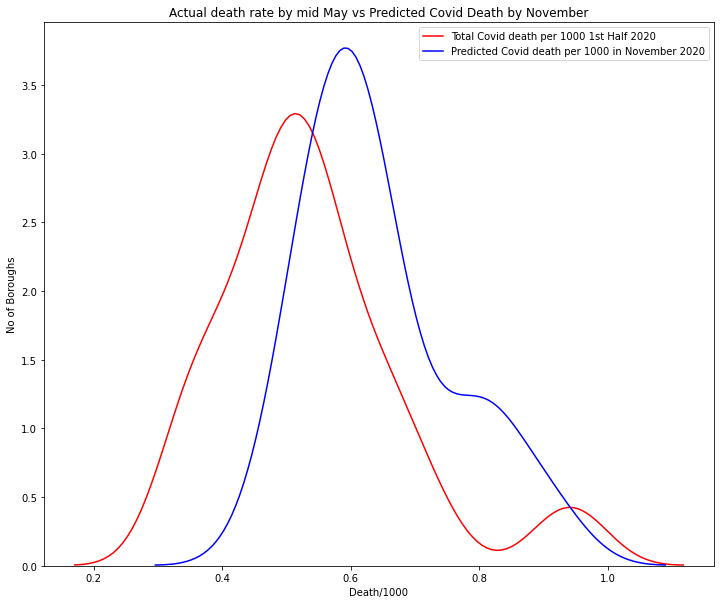

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_borough_sum['covid_19_deaths_1st_5m_pp'], hist=False, color="r", label="Total Covid death per 1000 1st Half 2020")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Covid death per 1000 in November 2020", ax=ax1 )


plt.title('Actual death rate by mid May vs Predicted Covid Death by November')
plt.xlabel('Death/1000')
plt.ylabel('No of Boroughs')

plt.show()
plt.close()

In [29]:
# Use Covid Death per thousand of the population data 
# Make into a map
London_map = folium.Map(width=700,height=500,location=[51.50,-0.11], zoom_start=10, tiles='Mapbox Bright')
London_geo = r'london_boroughs.json'
# generate choropleth map that includes all London boroughs currently coloured based on the population
myscale = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

choropleth = folium.Choropleth(
    geo_data=London_geo,
    data=df_borough_sum_1,
columns=[ 'Borough','covid_19_deaths_pp_in_Nov_est'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
     threshold_scale=myscale,
    legend_name='London Borough Covid-19 predicted death rate in November 2020',
).add_to(London_map)

folium.LayerControl().add_to(London_map)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=False)
)
London_map